In [ ]:

#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *

# import my functions stored in the file 'functions' which can then be called with functions.function_name()
import functions



### Plotting and Output Variables 
plot_data = False # set to True to plot the data and export to path_out
powerpoint_data = False # set to True to export the data to a powerpoint presentation and export to path_out
fig_format = 'png' # format of the figure to be saved
plot_transparency = True # set to True to make the data plots transparent




##########TO DO LIST
# change so that if film_thickness == 1 all the functions output the sheet resistance
# and the plots show sheet resistance instead of resistivity
# including the output file names
# - SET to zero for sheet resistance calculations instead of resistivity??????

# check and sort the material title and plotstrings in a way that makes sense - perhaps appending them together?
# update so that i only have one set of markers, defined here and used throughout. Perhaps with colors it should be generated with the
# data extraction matching the field and current values to the markers and colors

### Need colormaps that correspond to the field value and the temperature value not the index (so that the colors are consistent across the plots regardless 
# of the number of fields used)


############## End User Defined Variables ##############


## Import Measurement Data 

In [2]:
all_directories = [] # list of all the directories containing the data
dat_raw = [] # list in which each item contains a list for each directory of all the files within it (list of lists)

### First data set
all_directories.append(Path('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_JT029_SrRuO3/Data/'))
dat_raw.append(functions.import_ppms_data(all_directories[0], film_thickness = 14e-9, material = '$SrRuO_3$', plot_str = 'JT029_SrRuO3'))

### Second data set
all_directories.append(Path('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_HC003_BaSnO3/Data/'))
dat_raw.append(functions.import_ppms_data(all_directories[1], film_thickness = 100e-9, material = '$BaSnO_3$', plot_str = 'HC003_BaSnO3'))

### Third data set
all_directories.append(Path('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_YFW042_HZO/Data/'))
dat_raw.append(functions.import_ppms_data(all_directories[2], film_thickness = 1e-9, material = '$HfO_2$', plot_str = 'YFW042_HZO'))
    
#Output directory to save plots and PowerPoint to - always defined by the first data set
path_out = Path(str(all_directories[0]).replace('/Data/', '/Output/'))

# Note that fields have been converted to Tesla

File 1 imported: JT029_SrRuO3_171024_Combined with shape (650, 5, 6)
File 2 imported: JT029_SrRuO3_101024_HallRun1 with shape (72, 5, 6)
Error with file: .DS_Store, 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
File 4 imported: JT029_SrRuO3_091024_Halltest2 with shape (68, 5, 6)
File 5 imported: JT029_SrRuO3_171024_Combined_fullrange.txt with shape (850, 5, 6)
File 6 imported: JT029_SrRuO3_191024_Combined4 with shape (8712, 5, 6)
Error with file: .DS_Store, 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
File 2 imported: HC003_BaSnO3_STO_061124_Hall with shape (3024, 5, 6)
File 1 imported: YF042_HfO2_STO_071124_Hall_2 with shape (3660, 5, 6)
File 2 imported: YF042_HfO2_STO_071124_Hall_5 with shape (2508, 5, 6)
File 3 imported: YF042_HfO2_STO_071124_Hall_3 with shape (3168, 5, 6)
File 4 imported: YF042_HfO2_STO_071124_Hall_6 with shape (814, 5, 6)


## Select Data for Plotting

In [3]:
# First visualise the data contained in each list
for count, dat in enumerate(dat_raw):
    print(f'dat_{count}:', [f'{count_2}={d.filename}' for count_2, d in enumerate(dat)])


# Select the data sets to be plotted and put into a single list
dat_raw_sel = [dat_raw[2][2], dat_raw[2][1], dat_raw[2][3]]
print('dat:', [f'{count}={d.filename}' for count, d in enumerate(dat_raw_sel)])

dat_0: ['0=JT029_SrRuO3_171024_Combined', '1=JT029_SrRuO3_101024_HallRun1', '2=JT029_SrRuO3_091024_Halltest2', '3=JT029_SrRuO3_171024_Combined_fullrange.txt', '4=JT029_SrRuO3_191024_Combined4']
dat_1: ['0=HC003_BaSnO3_STO_061124_Hall']
dat_2: ['0=YF042_HfO2_STO_071124_Hall_2', '1=YF042_HfO2_STO_071124_Hall_5', '2=YF042_HfO2_STO_071124_Hall_3', '3=YF042_HfO2_STO_071124_Hall_6']
dat: ['0=YF042_HfO2_STO_071124_Hall_3', '1=YF042_HfO2_STO_071124_Hall_5', '2=YF042_HfO2_STO_071124_Hall_6']


## Extract and Check Temperature, Field, and Current values

In [4]:
# Extract the current, temperature and field values from the data as lists along with the number of values used for each
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
# Reduced_temp = [3,-1] will skip the first 3 temperature points and the last 1 temperature point

dat = functions.extract_ctf(dat_raw_sel, Reduced_temp = False, Reduced_current=False)
# Check you have the expected and correct Temperature, Field and Current values!

# Update a single data file with reduced temperature or current values
#dat[0] = functions.extract_ctf([dat_raw_sel[0]], Reduced_temp = [0,-3], Reduced_current=False)[0]



For file: YF042_HfO2_STO_071124_Hall_3
11 Currents (uA): [-100.  -80.  -60.  -40.  -20.    0.   20.   40.   60.   80.  100.]
16 Temperatures (K): [  5.  25.  45.  65.  85. 105. 125. 145. 165. 185. 205. 225. 245. 265.
 285. 305.]
18 Fields (kOe): [-80. -70. -60. -50. -40. -30. -20. -10.  -0.   0.  10.  20.  30.  40.
  50.  60.  70.  80.]
Is this correct?
For file: YF042_HfO2_STO_071124_Hall_5
11 Currents (uA): [-1000.  -800.  -600.  -400.  -200.     0.   200.   400.   600.   800.
  1000.]
6 Temperatures (K): [ 2.  7. 12. 17. 22. 27.]
38 Fields (kOe): [-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.  -0.   0.   5.  10.  15.  20.  25.  30.  35.  40.
  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.]
Is this correct?
For file: YF042_HfO2_STO_071124_Hall_6
11 Currents (uA): [-5000. -4000. -3000. -2000. -1000.     0.  1000.  2000.  3000.  4000.
  5000.]
1 Temperatures (K): [2.]
74 Fields (kOe): [-90. -88. -85. -83. -80. -78. -75. -73. -70. -68. -65

## Calculate VDP Resistivity, Magnetoresistance, Hall Coefficient and Hall Mobility


In [5]:
# Extract the resistivity using the VDP method and write to the PPMSData objects in the list "dat"
dat = functions.vdp_resistivity(dat)

# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = functions.magnetoresistance(dat)

# Calculate the Hall coefficient and mobility
# hall_mobility(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = functions.vdp_hall(dat)


/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:277: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  R_sheet_A = fsolve(vdp_equation, initial_guess, args=(R_32_10[0], R_20_31[0]))[0]
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:280: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  R_sheet_B = fsolve(vdp_equation, initial_guess, args=(R_01_23[0], R_13_02[0]))[0]
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:277: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_sheet_A = fsolve(vdp_equation, initial_guess, args=(R_32_10[0], R_20_31[0]))[0]
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:280: RuntimeWarning: The iteration is not 

## Plot IV data to Check Linearity of Resitivity Measurements

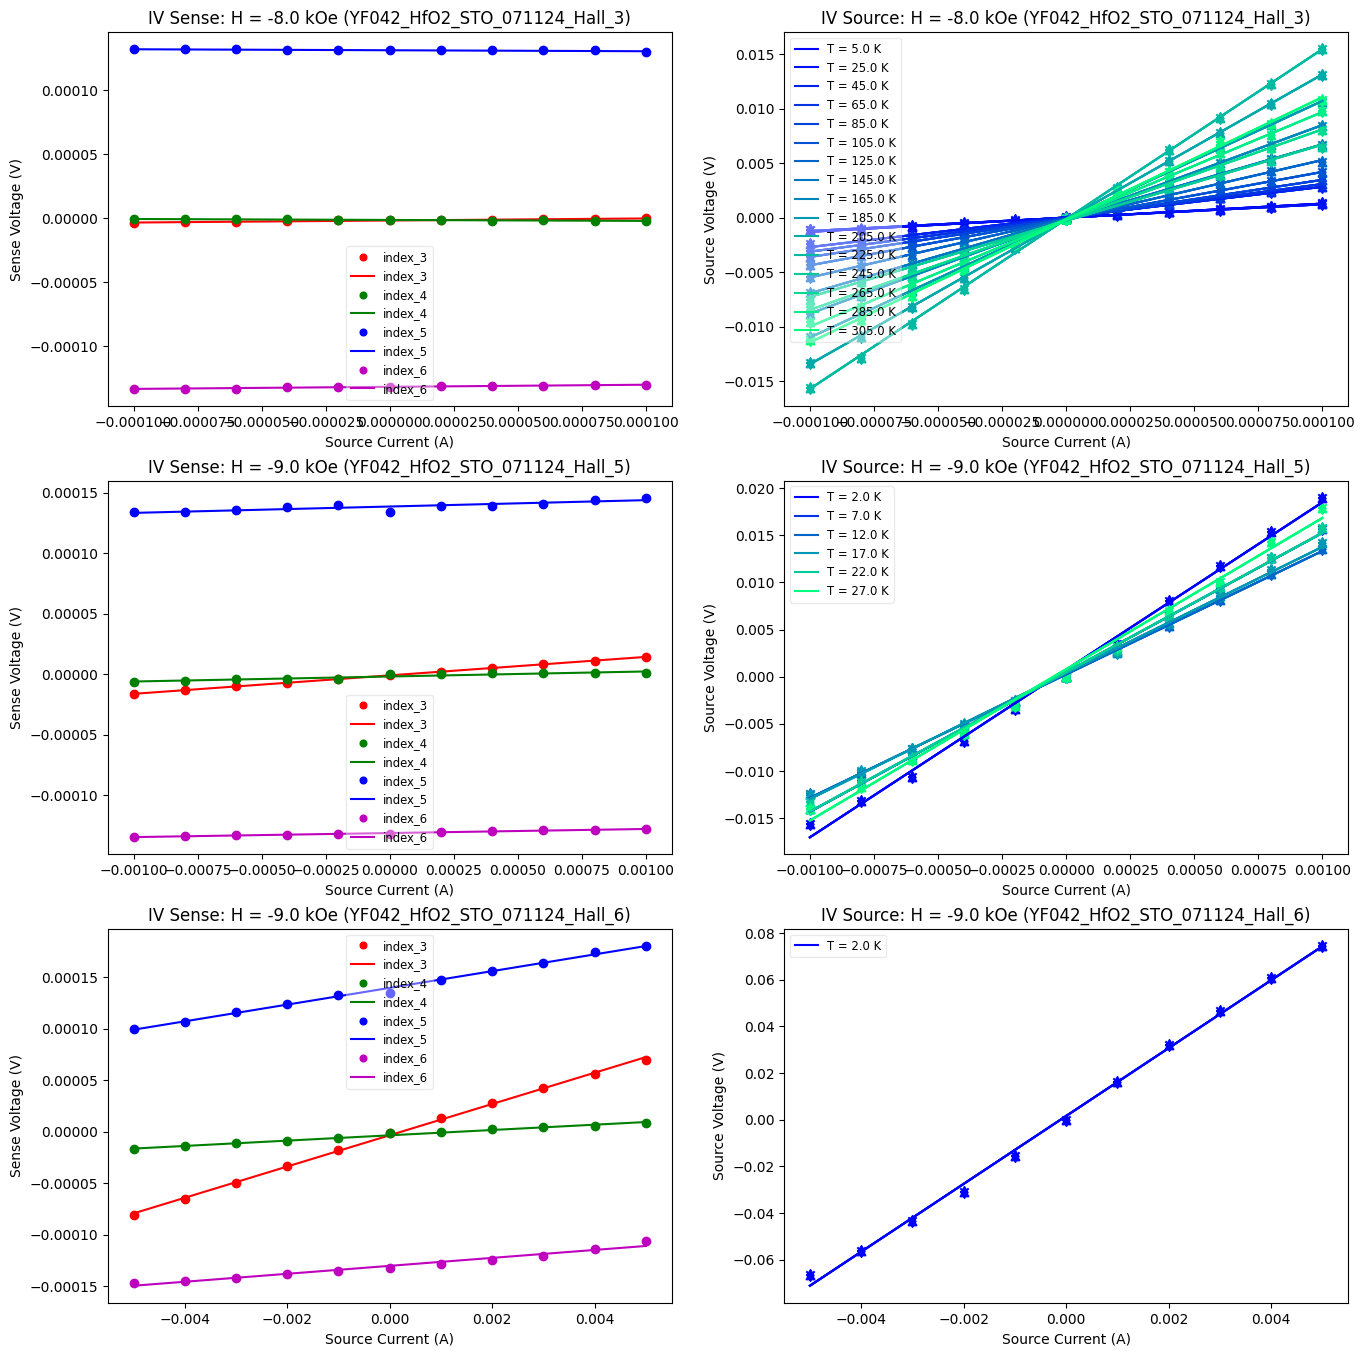

In [6]:
fig0 = plt.figure(figsize=(16, 5.5*len(dat)))
gs = fig0.add_gridspec(len(dat), 2)
labels = ['index_3', 'index_4', 'index_5', 'index_6']
color_s = ['r', 'g', 'b', 'm'] # simple four colors for the 4 configurations of vdp

for j, d in enumerate(dat):
    
    ax = fig0.add_subplot(gs[j, 0])
    ax1 = fig0.add_subplot(gs[j, 1])

    ## Plotting Source(I) vs Sense(V) data
    for i in range(4):
        R_test = linregress(d.data_np[0:d.ctf[3], 2, 2+i], d.data_np[0:d.ctf[3], 4, 2+i])
        ax.plot(d.data_np[0:d.ctf[3], 2, 2+i], d.data_np[0:d.ctf[3], 4, 2+i], 'o', label=f'{labels[i]}', color=color_s[i])
        ax.plot(d.data_np[0:d.ctf[3], 2, 2+i], R_test.intercept + R_test.slope * d.data_np[0:d.ctf[3], 2, 2+i], color=color_s[i], label=f'{labels[i]}')
    ax.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

    # Set labels and title
    ax.set_xlabel('Source Current (A)')
    ax.set_ylabel('Sense Voltage (V)')
    ax.set_title(f'IV Sense: H = {np.round(d.data_np[0, 1, 2],decimals=0)} kOe ({d.filename})')


    ## Plotting the Source IV data
    colors = plt.get_cmap('winter')(np.linspace(0, 1, d.ctf[4]))
    markers = ['+', 'x', '^', 'd']
    for t in range(d.ctf[4]):
        counter = t*d.ctf[3]*d.ctf[5]
        for i in range(4):  
            R_test_2 = linregress(d.data_np[counter:d.ctf[3]+counter, 2, 2], d.data_np[counter:d.ctf[3]+counter, 3, 2+i])
            ax1.scatter(d.data_np[counter:d.ctf[3]+counter, 2, 2+i], d.data_np[counter:d.ctf[3]+counter, 3, 2+i], color=colors[t], marker=markers[i])
            ax1.plot(d.data_np[counter:d.ctf[3]+counter, 2, 2+i], R_test_2.intercept + R_test_2.slope * d.data_np[counter:d.ctf[3]+counter, 2, 2+i], color=colors[t])
        
        # Add a dummy plot for the legend entry
        ax1.plot([], [], color=colors[t], label=f'T = {d.ctf[1][t]} K')
        
        ax1.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

    # Set labels and title
    ax1.set_xlabel('Source Current (A)')
    ax1.set_ylabel('Source Voltage (V)')
    ax1.set_title(f'IV Source: H = {np.round(d.data_np[0, 1, 2],decimals=0)} kOe ({d.filename})')


plt.show()

if plot_data == True:
    fig0.savefig(Path(path_out).joinpath(f'{plot_string}_IV_resistivity.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## R-squared Analysis to Check Linearity of I-V data

average R-squared for YF042_HfO2_STO_071124_Hall_3 = 0.9456961224671926
average R-squared for YF042_HfO2_STO_071124_Hall_5 = 0.9834256360293288
average R-squared for YF042_HfO2_STO_071124_Hall_6 = 0.9901560962061006


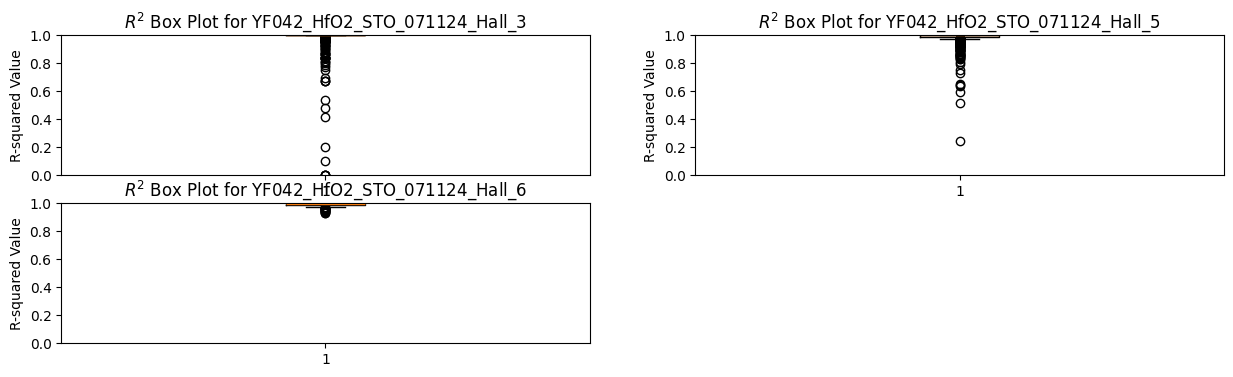

In [7]:
fig1 = plt.figure(figsize=(15, 3*len(dat) // 2))
gs = fig1.add_gridspec(1+len(dat) // 2, 2)

for j, d in enumerate(dat):
    print(f'average R-squared for {d.filename} =', sum(d.R_squared_res) / len(d.R_squared_res))
    ax = fig1.add_subplot(gs[j // 2, j % 2])
    
    # Plot R-square values in a boxplot
    # Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
    ax.boxplot(d.R_squared_res)
    ax.set_title(f'$R^2$ Box Plot for {d.filename}')
    ax.set_ylabel('R-squared Value')
    ax.set_ylim(0, 1)  # If needed, you can set x-axis limits too

plt.show()

if plot_data == True:
    fig1.savefig(Path(path_out).joinpath(f'{plot_string}_IV_Rsq_boxplot.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Resistivity Configuration Compararison 
Comparing the resistivity in configuration A and B which are inverted versions of one another (e.g. source meter and sense meter swapped positions)
This is a good check for any systematic errors

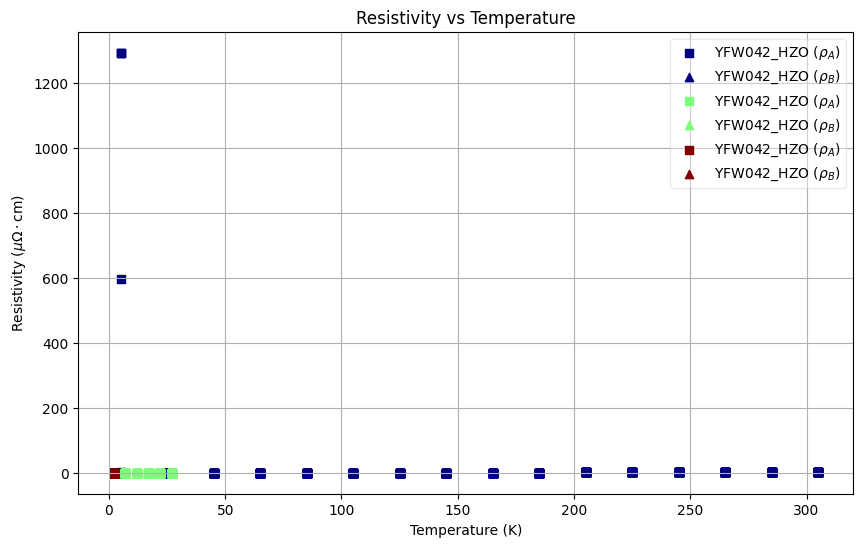

In [8]:
# Create a figure and axis
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(111)  # Create a single subplot

c_val = plt.cm.jet(np.linspace(0,1,len(dat)))

# Loop over the data sets
for j, d in enumerate(dat):
    
    # Plot R_sheet_A vs Temp
    ax.scatter(d.res_data[:,0], d.res_data[:,2] * 1e8, marker='s', color=c_val[j], label=f'{d.plot_str} ($\\rho_A$)')

    # Plot R_sheet_B vs Temp
    ax.scatter(d.res_data[:,0], d.res_data[:,3] * 1e8, marker='^', color=c_val[j], label=f'{d.plot_str} ($\\rho_B$)')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_title('Resistivity vs Temperature')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig2.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_A_vs_B.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Resistivity vs Temperature

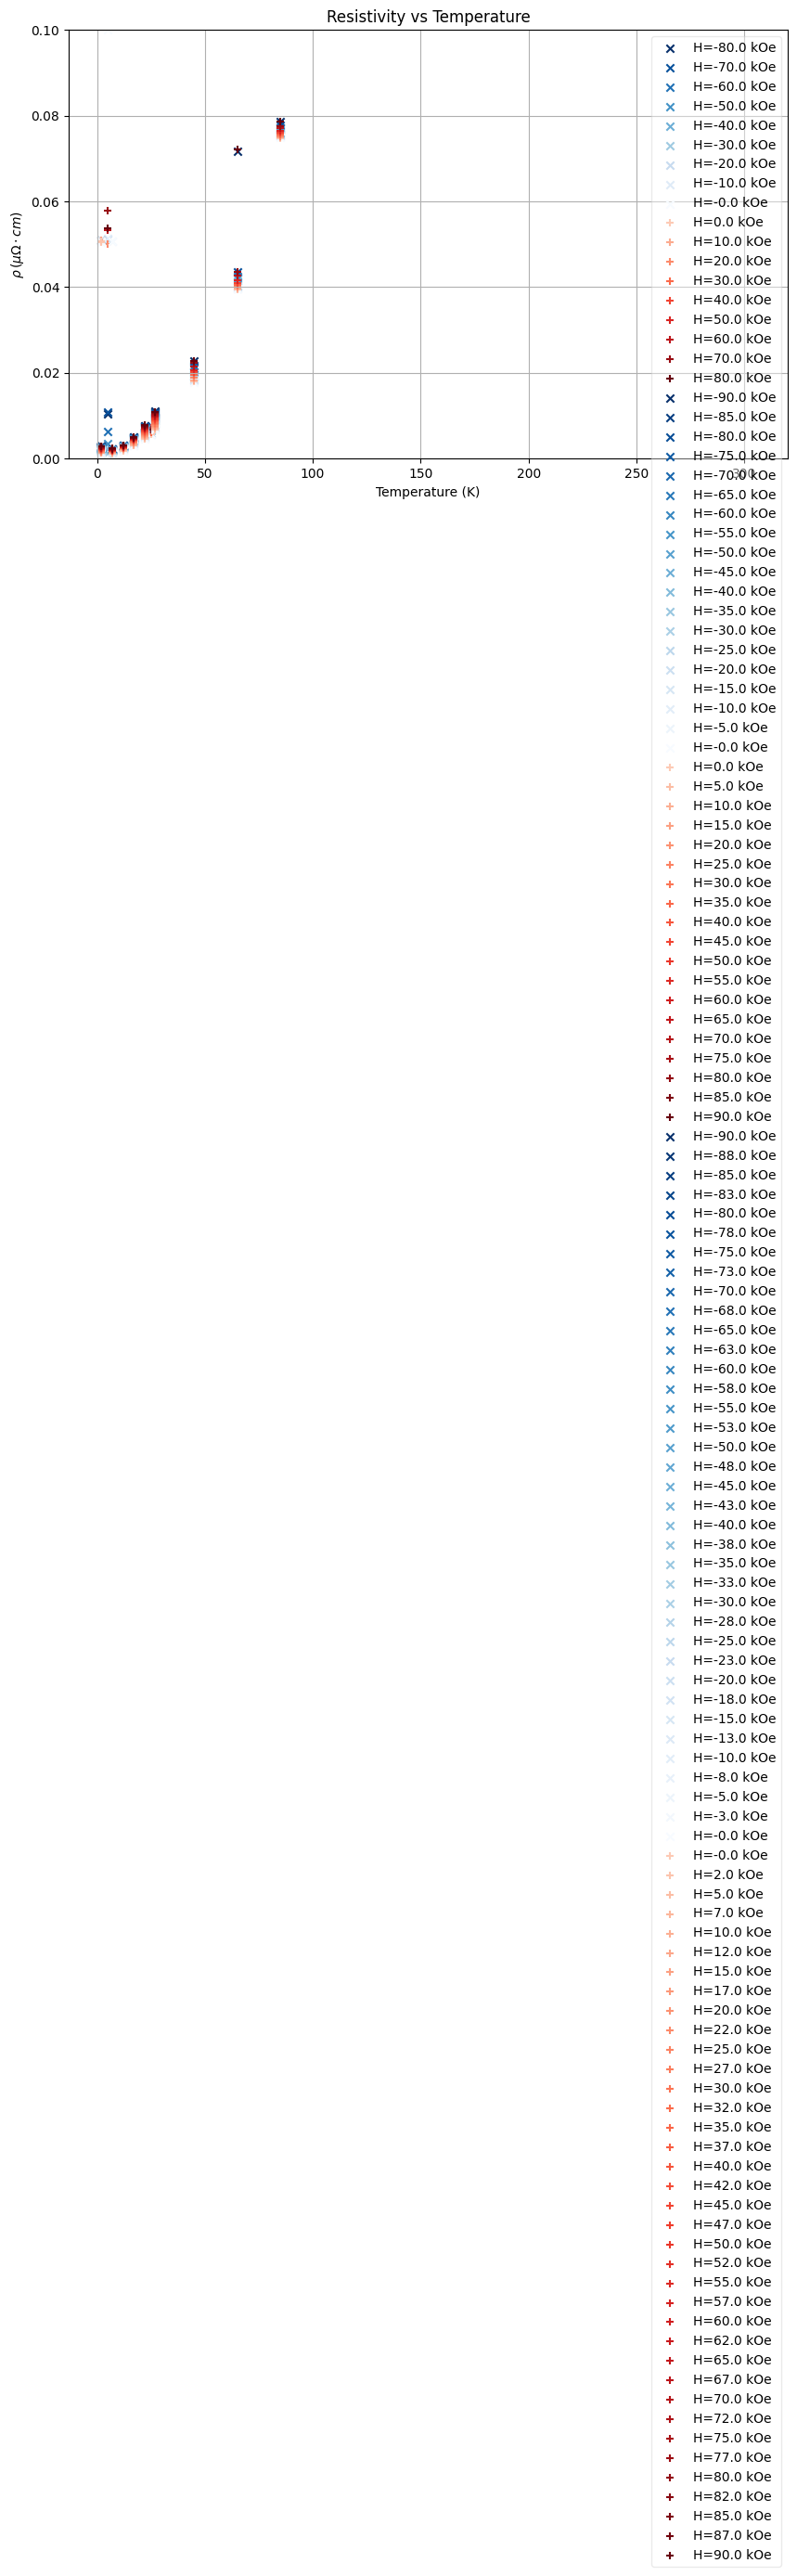

In [16]:
# Create a figure and axis
fig3 = plt.figure(figsize=(10, 6))
ax = fig3.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Generating one set of colors for increasing positive field and one set for decreasing negative field
    # higher field is brighter color in both cases
    cmap1 = plt.get_cmap('Blues_r')(np.linspace(0, 1, int(d.ctf[5] / 2)))
    cmap2 = plt.get_cmap('Reds')(np.linspace(0.2, 1, int(d.ctf[5] / 2)))
    c_val = np.vstack((cmap1, cmap2))

    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['x'] * int(d.ctf[5] / 2) + ['+'] * int(d.ctf[5] / 2)

    for k in range(d.ctf[5]):
        # Plot rho_film vs Temp
        ax.scatter(d.res_data[k::d.ctf[5], 0], d.res_data[k::d.ctf[5], 4] * 1e8, marker=markers[k], color=c_val[k], label=f'H={np.round(d.res_data[k, 1] * 10, decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho\,(\mu \Omega \cdot cm)$')
ax.set_title(f'Resistivity vs Temperature')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4)

ax.set_ylim(0, 0.1)

# Show the plot
plt.show()

if plot_data == True:
    fig3.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

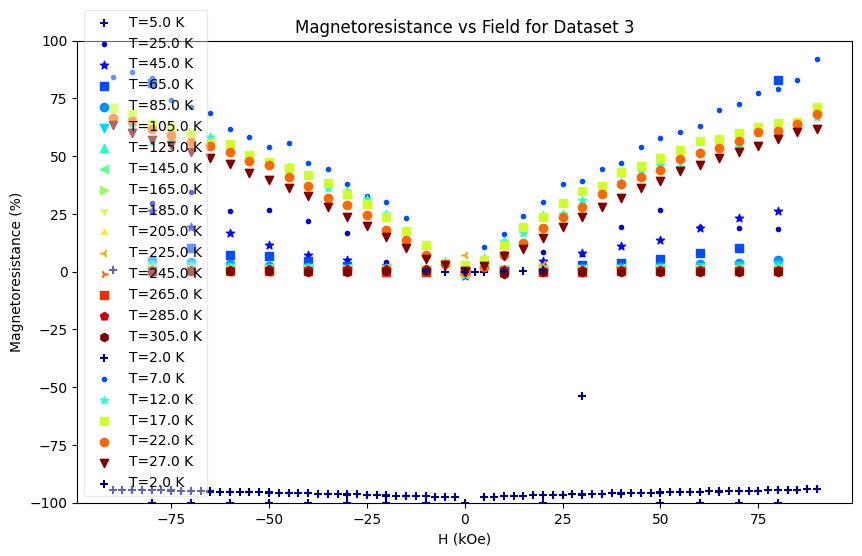

In [20]:
fig4 = plt.figure(figsize=(10, 6 ))
gs = fig4.add_gridspec(1, 1)
ax = fig4.add_subplot(gs[0, 0])
for j, d in enumerate(dat):
    
    
    # Create a color map for the temperature points
    c_val = plt.cm.jet(np.linspace(0, 1, d.ctf[4]))
    # Create a marker array for the temperature points
    markers = ['+', '.', '*', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', 'h', 'H', 'x', 'D', 'd', '|', '_']

    for t_count, t in enumerate(d.ctf[1], start=0):  
        if t > 1:
            # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
            ax.scatter(d.ctf[2][:] * 10, d.mag_res[t_count, :, 2], marker=markers[t_count % len(markers)], color=c_val[t_count], label=f'T={t} K')
            # Plot repeat point of B=0 with an x marker to show the difference between two B=0 points
            # ax.scatter(d.ctf[2][int(d.ctf[5] / 2)] * 10, d.mag_res[t_count, int(d.ctf[5] / 2), 2], marker='x', color=c_val[t_count])
    
ax.set_xlabel('H (kOe)')
ax.set_ylabel('Magnetoresistance (%)')
ax.set_title(f'Magnetoresistance vs Field for Dataset {j+1}')
ax.legend(loc='best', framealpha=0.4)
ax.set_ylim(-100, 100)

plt.show()

if plot_data == True:
    fig4.savefig(Path(path_out).joinpath(f'{d.plot_str}_magnetoresistance_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Magnetoresistance Vs T
- Now looking at how the Magnetoresitance at a set field strength varies over temperature
- Displaying this for VDP configuration A, VDP configuration B and the average of the two

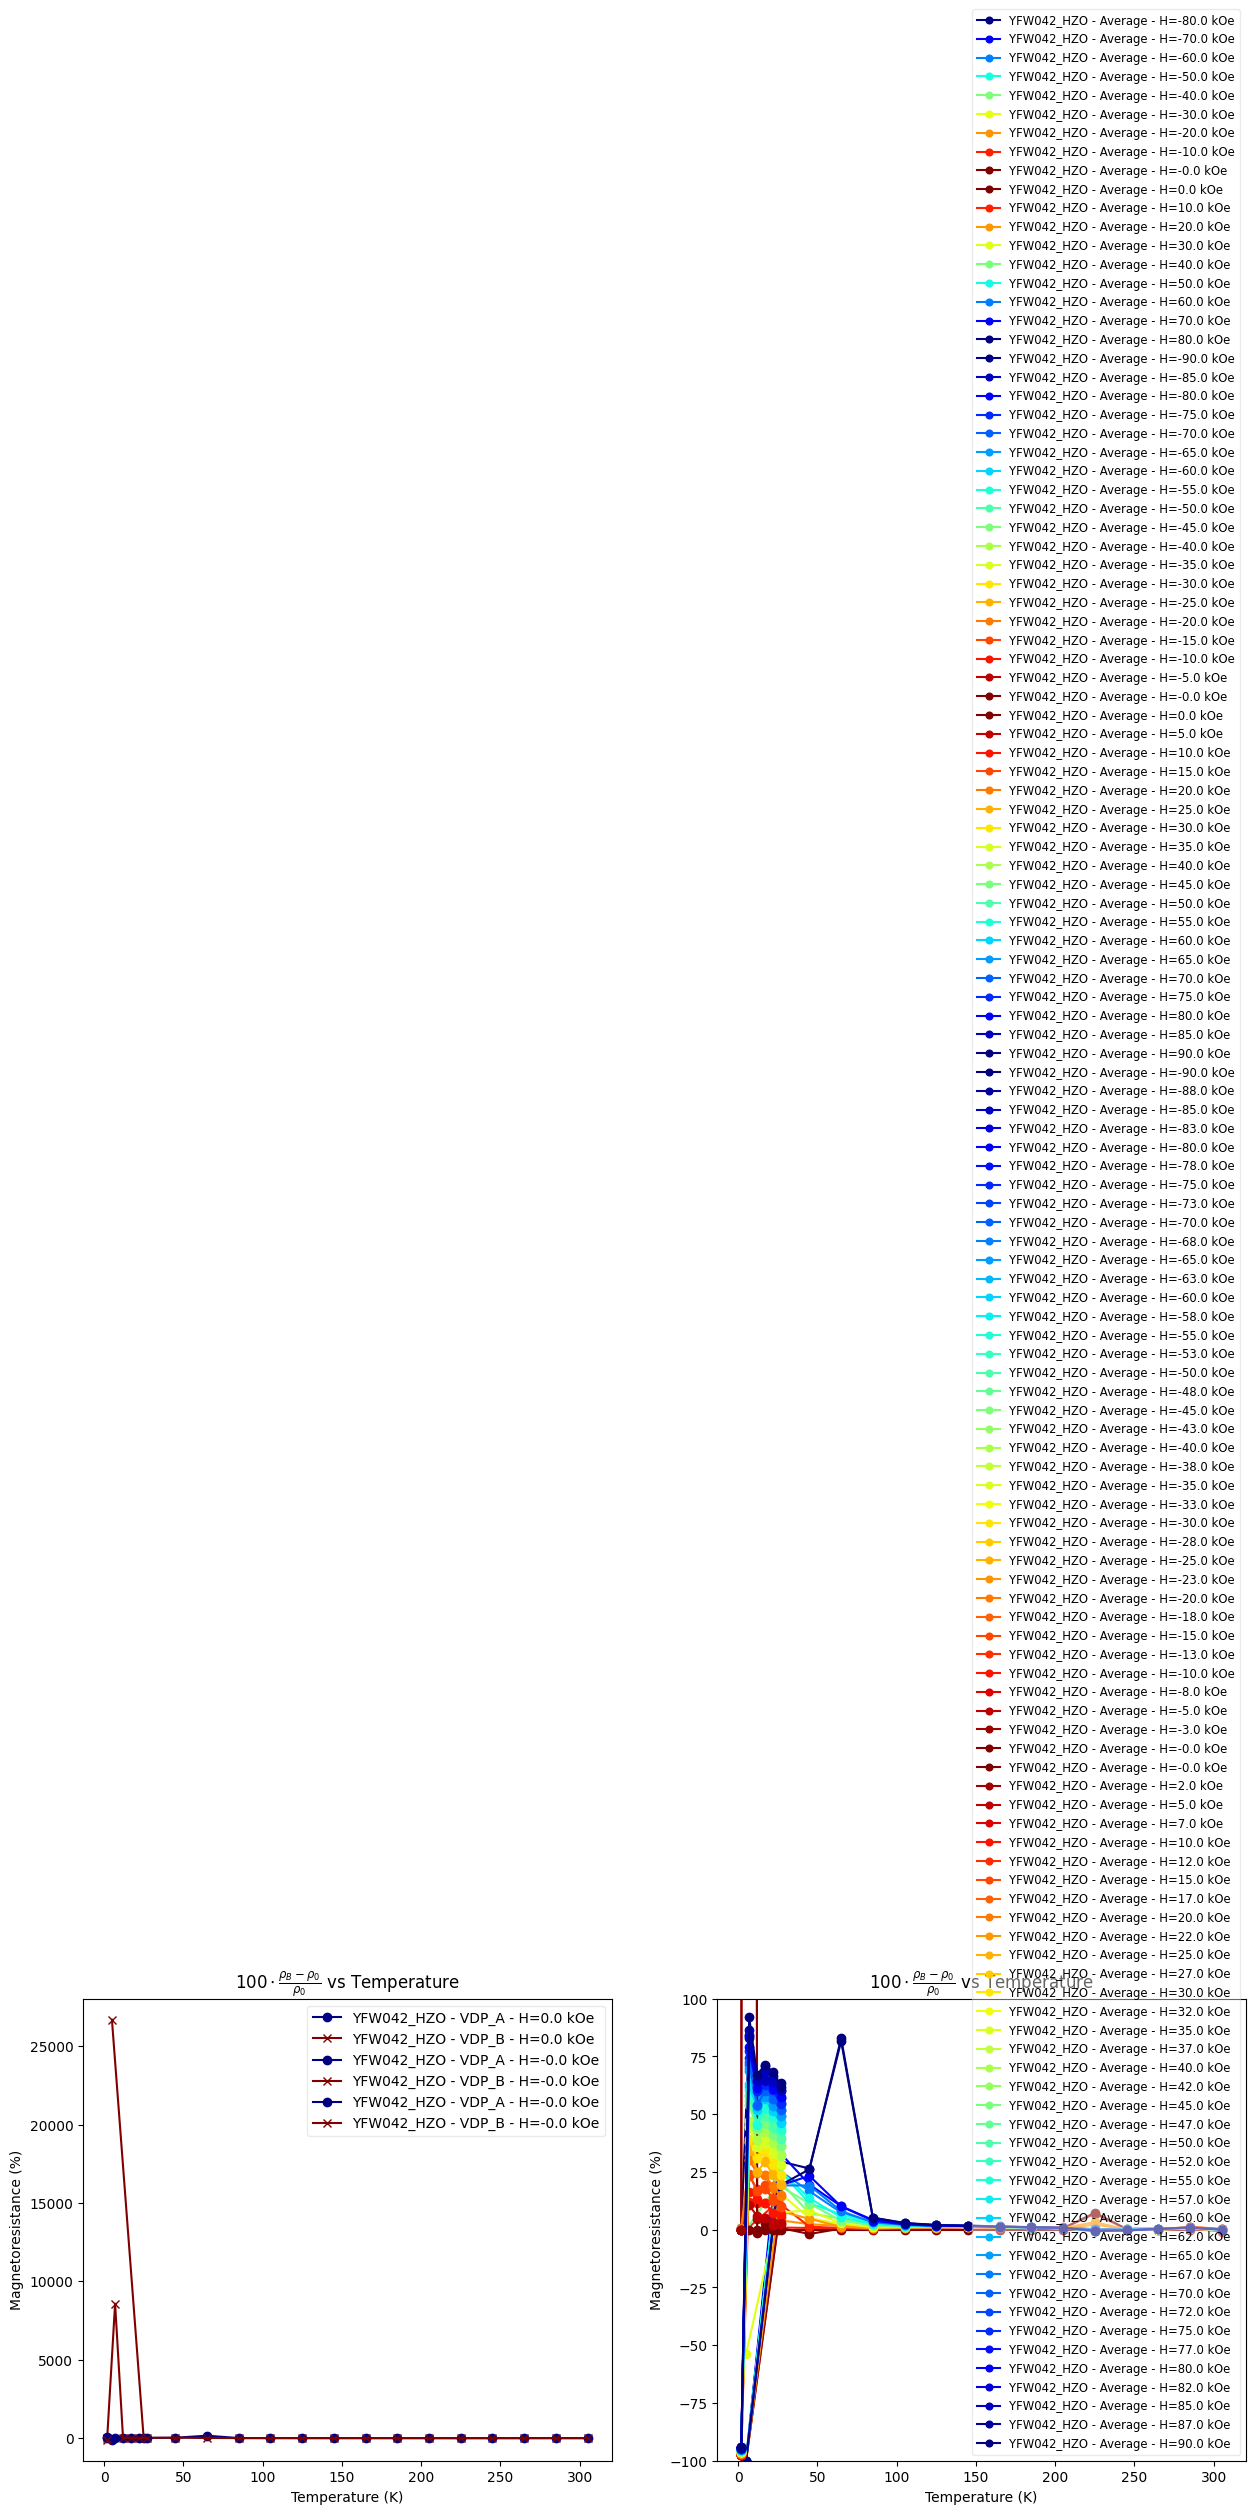

In [26]:
fig5 = plt.figure(figsize=(15, 6))
ax = fig5.add_subplot(121)  # Create two subplots
ax2 = fig5.add_subplot(122)  

# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('jet')(np.linspace(0, 1, int(dat[0].ctf[5] / 2)))
cmap2 = plt.get_cmap('jet_r')(np.linspace(0, 1, int(dat[0].ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))



# Find the index of the maximum positive field strength
f_index = int(dat[0].ctf[5]) - 1

# Sub_plot 1: Comparing configurations A and B
for d in dat:
    ax.plot(d.ctf[1], d.mag_res[:, f_index, 0], marker='o', color=c_val[0], label=f'{d.plot_str} - VDP_A - H={np.round(d.ctf[2][f_index]/1000, 0)} kOe')
    ax.plot(d.ctf[1], d.mag_res[:, f_index, 1], marker='x', color=c_val[int(len(c_val)/2)], label=f'{d.plot_str} - VDP_B - H={np.round(d.ctf[2][f_index]/1000, 0)} kOe')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend(loc='best', framealpha=0.4)

# Sub_plot 2: Comparing the average magnetoresistance vs T for various field strengths 
for d in dat:
    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['*'] * int(d.ctf[5] / 2) + ['+'] * int(d.ctf[5] / 2)
    # Generating one set of colors for increasing positive field and one set for decreasing negative field
    cmap1 = plt.get_cmap('jet')(np.linspace(0, 1, int(d.ctf[5] / 2)))
    cmap2 = plt.get_cmap('jet_r')(np.linspace(0, 1, int(d.ctf[5] / 2)))
    c_val = np.vstack((cmap1, cmap2))
    
    for H_count, H in enumerate(d.ctf[2], start=0):
        ax2.plot(d.ctf[1], d.mag_res[:, H_count, 2], marker='o', color=c_val[H_count], label=f'{d.plot_str} - Average - H={np.round(d.ctf[2][H_count]*10, 0)} kOe')     
        
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Magnetoresistance (%)')
ax2.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
# Add a legend outside the plot
ax2.legend(loc='lower right', fontsize='small', markerscale=0.8, framealpha=0.4)

ax2.set_ylim(-100, 100)

plt.show()

if plot_data == True:
    fig5.savefig(Path(path_out).joinpath(f'{plot_string}_magnetoresistance_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Arhenius Plot

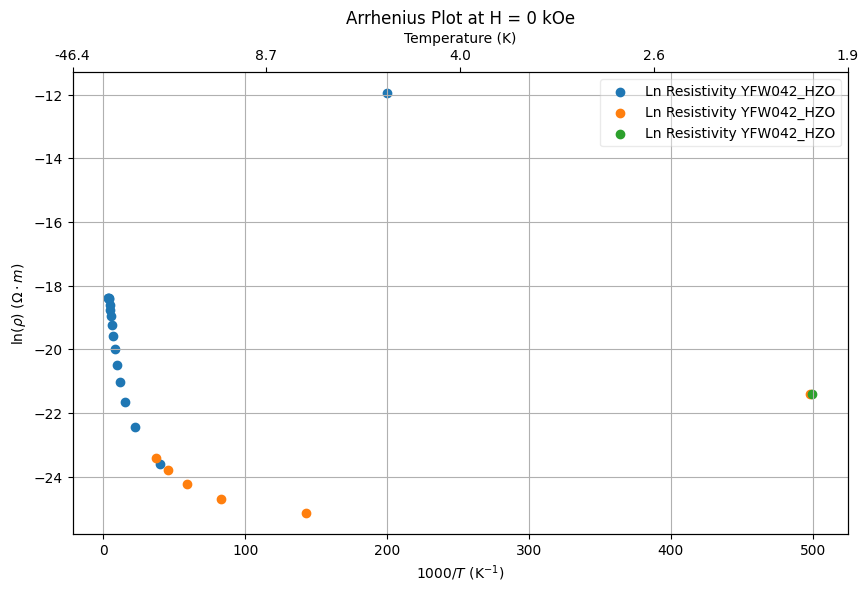

In [27]:
# Create a figure and axis
fig6 = plt.figure(figsize=(10, 6))
ax = fig6.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot rho_film vs 1000/Temp
    ax.scatter(1000 / d.res_data[int(d.ctf[5]/2)::d.ctf[5], 0], np.log(d.res_data[int(d.ctf[5]/2)::d.ctf[5], 4]), marker='o', linestyle='-', label=f'Ln Resistivity {d.plot_str}')

# Set labels and title
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')
ax.set_title('Arrhenius Plot at H = 0 kOe')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4)

# Create a secondary x-axis at the top
ax2 = ax.twiny()

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')

# Show the plot
plt.show()

if plot_data == True:
    fig6.savefig(Path(path_out).joinpath(f'{plot_string}_Arrhenius Plot.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall Resistivity ($\rho_{xy}$)
- This is: $\frac{V_{measured-perpendicular}}{I_{source}}*t$


## Plot IV Data to check linearity of Hall measurements

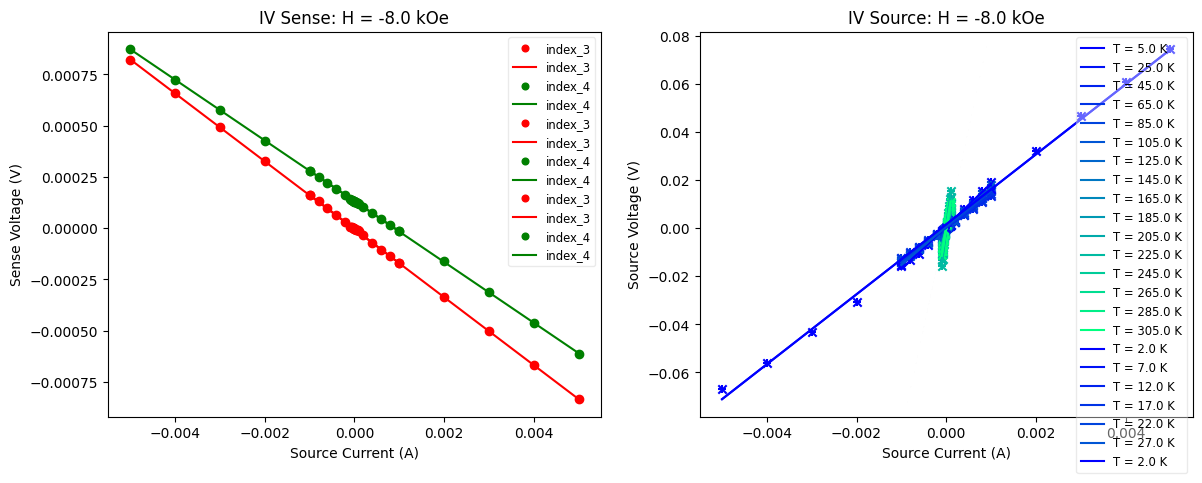

In [28]:
fig0 = plt.figure(figsize=(14, 5))
gs = fig0.add_gridspec(1, 2)
ax = fig0.add_subplot(gs[0, 0])
ax1 = fig0.add_subplot(gs[0, 1])

labels = ['index_3', 'index_4', 'index_5', 'index_6']

colors = ['r', 'g', 'b', 'm']
for j, d in enumerate(dat):
    for i in range(2):
        R_test = linregress(d.data_np[0:d.ctf[3], 2, i], d.data_np[0:d.ctf[3], 4, i]) 
        ax.plot(d.data_np[0:d.ctf[3], 2, i], d.data_np[0:d.ctf[3], 4, i], 'o', label=f'{labels[i]}', color=colors[i])
        ax.plot(d.data_np[0:d.ctf[3], 2, i], R_test.intercept + R_test.slope * d.data_np[0:d.ctf[3], 2, i], color=colors[i], label=f'{labels[i]}')
ax.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax.set_xlabel('Source Current (A)')
ax.set_ylabel('Sense Voltage (V)')
ax.set_title(f'IV Sense: H = {np.round(dat[0].data_np[0, 1, 2],decimals=0)} kOe')


## Plotting the Source IV data
colors = plt.get_cmap('winter')(np.linspace(0, 1, dat[0].ctf[4]))
markers = ['+', 'x', 'o', '*']
for j, d in enumerate(dat):
    for t in range(d.ctf[4]):
        counter = t*d.ctf[3]*d.ctf[5]
        for i in range(2):  
            R_test_2 = linregress(d.data_np[counter:d.ctf[3]+counter, 2, i], d.data_np[counter:d.ctf[3]+counter, 3, i])
            ax1.scatter(d.data_np[counter:d.ctf[3]+counter, 2, i], d.data_np[counter:d.ctf[3]+counter, 3, i], color=colors[t], marker=markers[i])
            ax1.plot(d.data_np[counter:d.ctf[3]+counter, 2, i], R_test_2.intercept + R_test_2.slope * d.data_np[counter:d.ctf[3]+counter, 2, i], color=colors[t])
        
        # Add a dummy plot for the legend entry
        ax1.plot([], [], color=colors[t], label=f'T = {d.ctf[1][t]} K')
    
    ax1.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax1.set_xlabel('Source Current (A)')
ax1.set_ylabel('Source Voltage (V)')
ax1.set_title(f'IV Source: H = {np.round(dat[0].data_np[0, 1, 2],decimals=0)} kOe')

plt.show()

if plot_data == True:
    fig0.savefig(Path(path_out).joinpath(f'{plot_string}_IV_resistivity.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## R-squared Analysis to Check Linearity of Resistivity I-V data

average R-squared_A for YF042_HfO2_STO_071124_Hall_3 = 0.9928851759963256
average R-squared_B for YF042_HfO2_STO_071124_Hall_3 = 0.9928851759963256


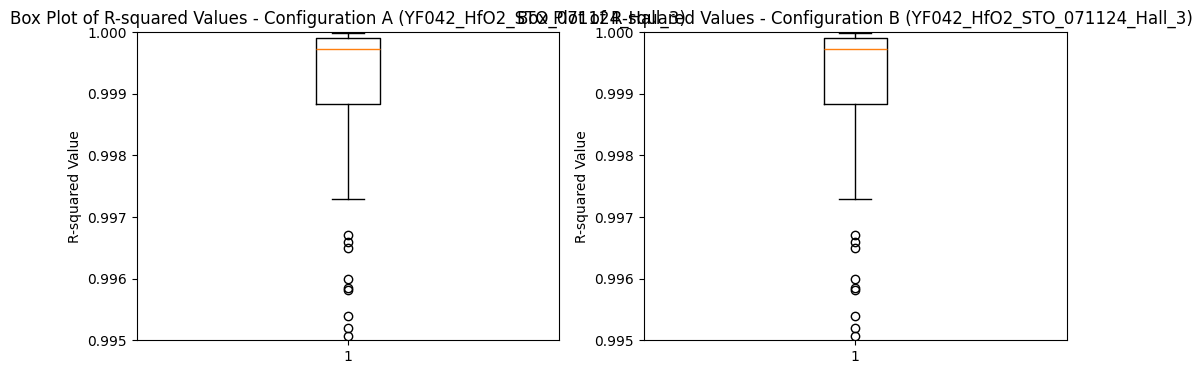

average R-squared_A for YF042_HfO2_STO_071124_Hall_5 = 0.9931763210924909
average R-squared_B for YF042_HfO2_STO_071124_Hall_5 = 0.9931763210924909


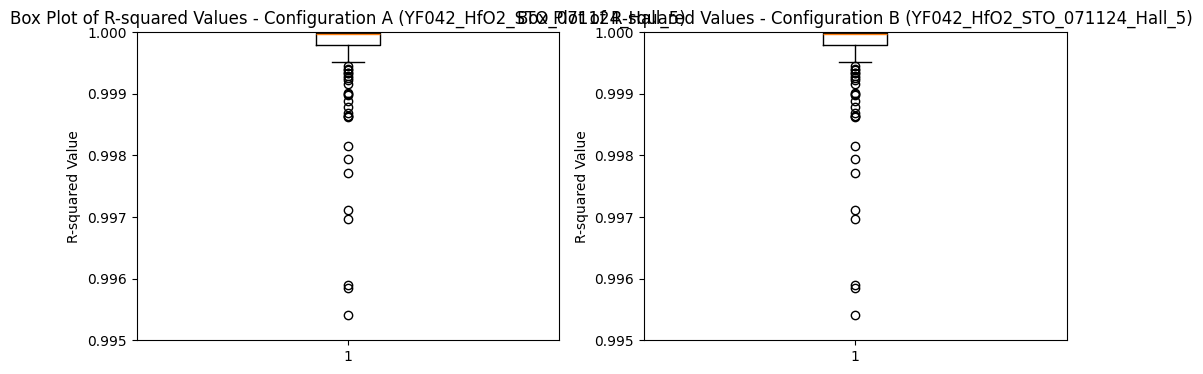

average R-squared_A for YF042_HfO2_STO_071124_Hall_6 = 0.9988729902936453
average R-squared_B for YF042_HfO2_STO_071124_Hall_6 = 0.9988729902936453


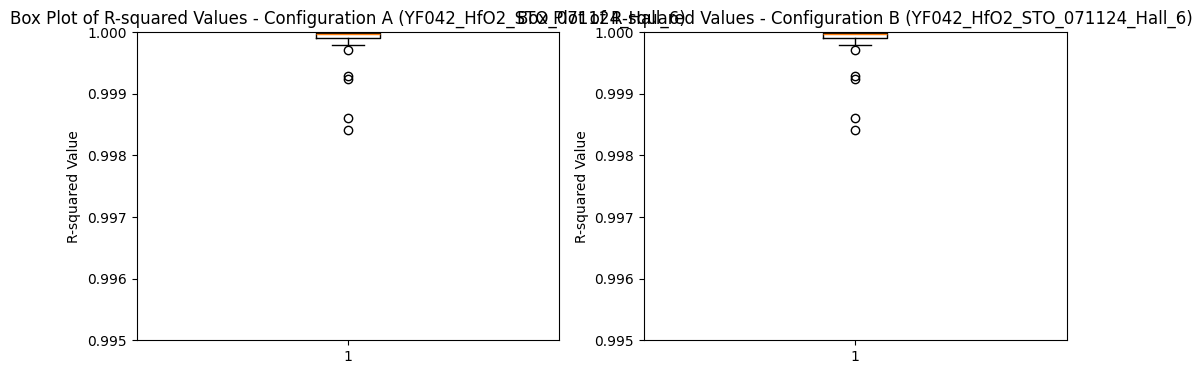

In [29]:
for d in dat:
    print(f'average R-squared_A for {d.filename} =', np.mean(np.abs(d.hall_data[:, 3])))
    print(f'average R-squared_B for {d.filename} =', np.mean(np.abs(d.hall_data[:, 5])))

    # Plot R-square values in a boxplot
    # Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
    fig7 = plt.figure(figsize=(12, 4))
    ax = fig7.add_subplot(121)
    ax.boxplot(np.abs(d.hall_data[:, 3]))
    ax.set_title(f'Box Plot of R-squared Values - Configuration A ({d.filename})')
    ax.set_ylabel('R-squared Value')
    ax.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too

    ax2 = fig7.add_subplot(122)
    ax2.boxplot(np.abs(d.hall_data[:, 5]))
    ax2.set_title(f'Box Plot of R-squared Values - Configuration B ({d.filename})')
    ax2.set_ylabel('R-squared Value')
    ax2.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too
    plt.show()

    if plot_data == True:
        fig7.savefig(Path(path_out).joinpath(f'{d.plot_str}_R_squared_hall_res.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Hall resisitivity vs Temperature

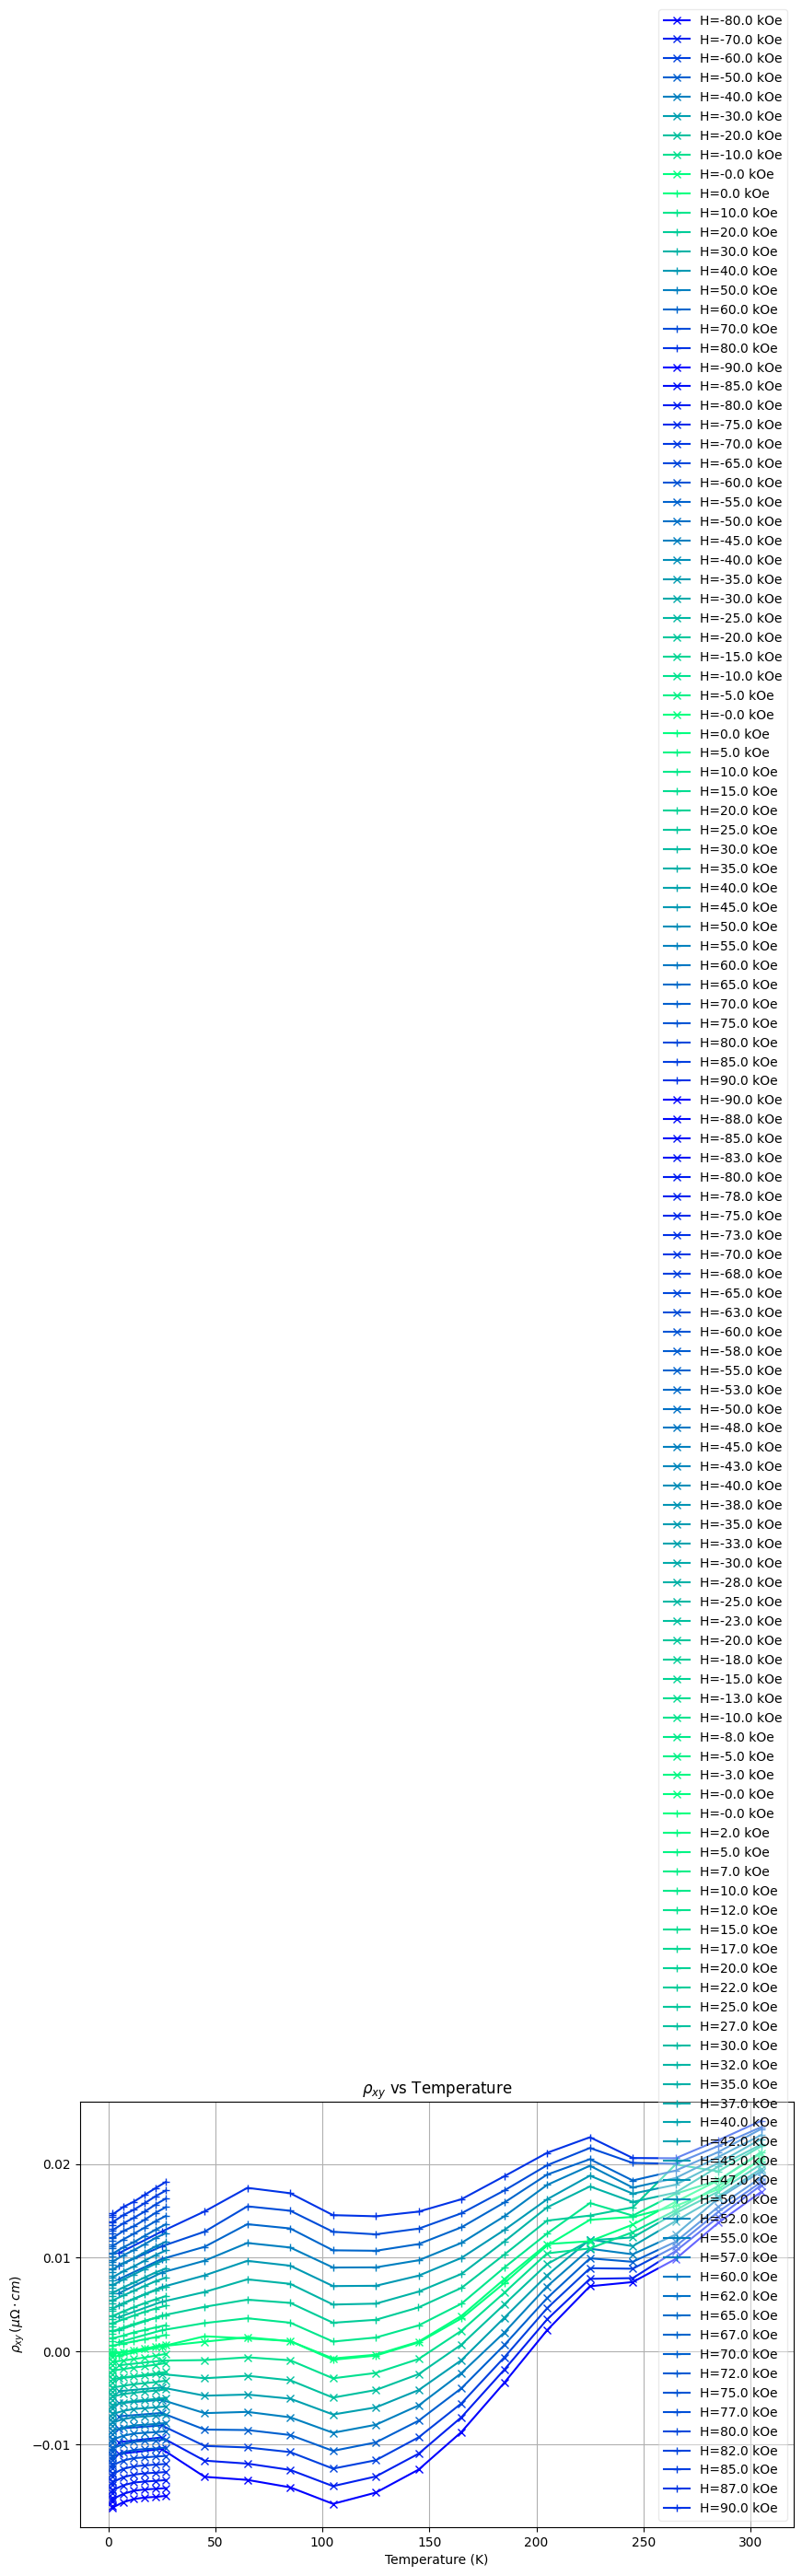

In [31]:
# Create a figure and axis
fig8 = plt.figure(figsize=(10, 6))
ax = fig8.add_subplot(111)  # Create a single subplot


for d in dat:
    # Generating one set of colors for increasing positive field and one set for decreasing negative field
    # higher field is brighter color in both cases
    cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(d.ctf[5] / 2)))
    cmap2 = plt.get_cmap('winter_r')(np.linspace(0, 0.8, int(d.ctf[5] / 2)))
    c_val = np.vstack((cmap1, cmap2))

    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['x'] * int(d.ctf[5] / 2) + ['+'] * int(d.ctf[5] / 2)
    
    for k in range(d.ctf[5]):
        # Plot rho_film vs Temp
        ax.plot(d.hall_data[k::d.ctf[5], 0], d.hall_data[k::d.ctf[5], 6] * 1e8, marker=markers[k], color=c_val[k], label=f'H={np.round(d.hall_data[k, 1] * 10, decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='lower right', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig8.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_T.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Hall Resistivity vs Field

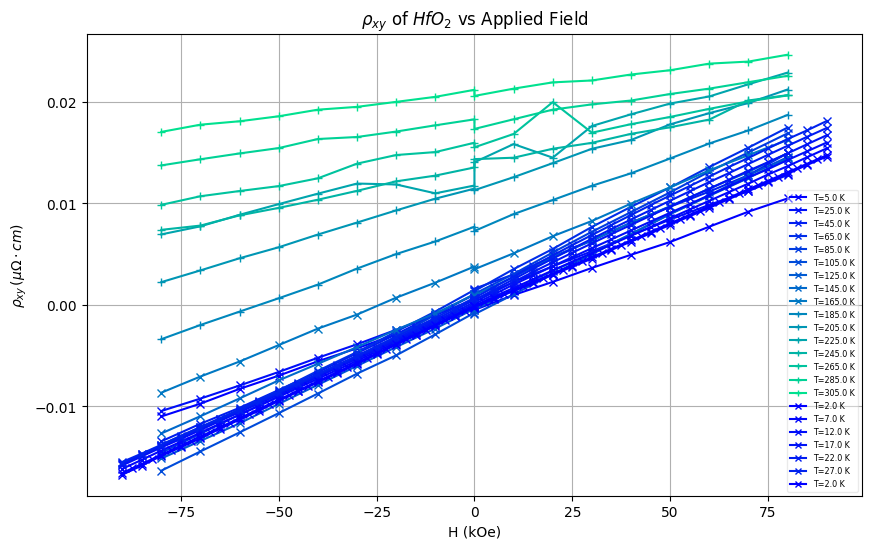

In [33]:
# Create a figure and axis
fig9 = plt.figure(figsize=(10, 6))
ax = fig9.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for d in dat:
    # Generating one set of colors for increasing positive field and one set for decreasing negative field
    # higher field is brighter color in both cases
    c_val = plt.get_cmap('winter')(np.linspace(0, 1, int(d.ctf[5])))


    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['x'] * int(d.ctf[5] / 2) + ['+'] * int(d.ctf[5] / 2)

    for t_count, t in enumerate(d.ctf[1], start=0):
        if t > 1:
            index = t_count * d.ctf[5]
            # Plot rho_film vs Temp
            ax.plot(d.hall_data[index:index+d.ctf[5], 1]*10, d.hall_data[index:index+d.ctf[5], 6]*1e8, marker=markers[t_count], color=c_val[t_count], label=f'T={np.round(t, decimals=0)} K')

# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4, markerscale=0.8, fontsize='xx-small')

# Show the plot
plt.show()

if plot_data == True:
    fig9.savefig(Path(path_out).joinpath(f'{d.plot_str}_rho_xy_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Hall Resistivity vs Field - Offset removed

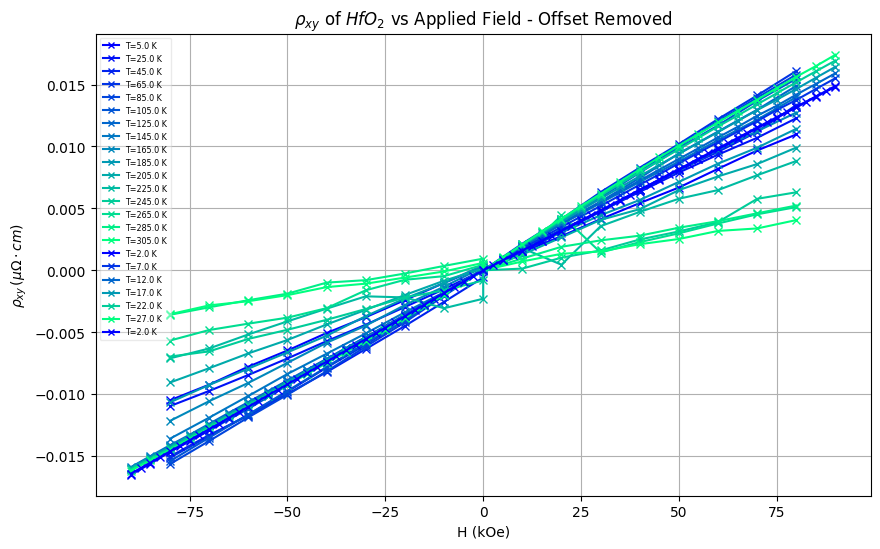

In [34]:
# Create a figure and axis
fig10 = plt.figure(figsize=(10, 6))
ax = fig10.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for d in dat:
    # Generating one set of colors for increasing positive field and one set for decreasing negative field
    # higher field is brighter color in both cases
    c_val = plt.get_cmap('winter')(np.linspace(0, 1, d.ctf[4]))

    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['x'] * d.ctf[4]

    for t_count, t in enumerate(d.ctf[1], start=0):
        if t > 1:
            index = t_count * d.ctf[5]
            # Plot rho_film vs Temp
            ax.plot(d.hall_data[index:index+d.ctf[5], 1]*10, (d.hall_data[index:index+d.ctf[5], 6]-d.hall_data[index+int(d.ctf[5]/2), 6])*1e8, marker=markers[t_count], color=c_val[t_count], label=f'T={np.round(t, decimals=0)} K')

# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field - Offset Removed')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4, markerscale=0.8, fontsize='xx-small')

# Show the plot
plt.show()

if plot_data == True:
    fig10.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_field_0offset.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Hall Coeff Vs T?

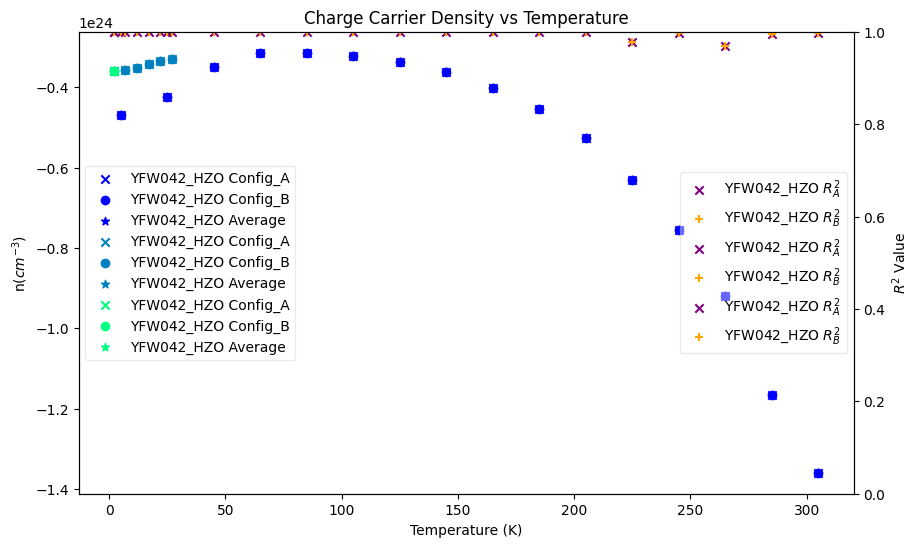

In [36]:
# Create a figure and axis
fig11 = plt.figure(figsize=(10, 6))
ax = fig11.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, len(dat)))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x', 'o', '*']

for j, d in enumerate(dat):
    ax.scatter(d.hall_coefficient[:, 0], 1e-6 * np.divide(-1, np.multiply(d.hall_coefficient[:, 1], scipy.constants.e)), marker=markers[0], color=c_val[j], label=f'{d.plot_str} Config_A')
    ax.scatter(d.hall_coefficient[:, 0], 1e-6 * np.divide(-1, np.multiply(d.hall_coefficient[:, 3], scipy.constants.e)), marker=markers[1], color=c_val[j], label=f'{d.plot_str} Config_B')
    ax.scatter(d.hall_coefficient[:, 0], 1e-6 * np.divide(-1, np.multiply(d.hall_coefficient[:, 5], scipy.constants.e)), marker=markers[2], color=c_val[j], label=f'{d.plot_str} Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'n($cm^{-3}$)')
ax.set_title(f'Charge Carrier Density vs Temperature')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left', framealpha=0.4)

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
for j, d in enumerate(dat):
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 2]), color='purple', marker='x', label=f'{d.plot_str} $R^2_A$')
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 4]), color='orange', marker='+', label=f'{d.plot_str} $R^2_B$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right', framealpha=0.4)
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig11.savefig(Path(path_out).joinpath(f'{plot_string}_n_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Mobility vs T

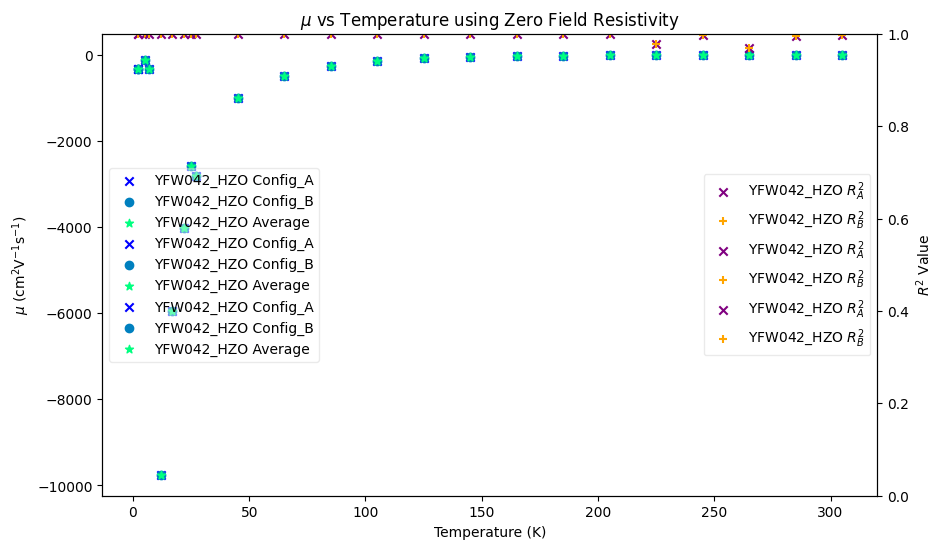

In [38]:
# Create a figure and axis
fig12 = plt.figure(figsize=(10, 6))
ax = fig12.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x', 'o', '*']

for d in dat:
    ax.scatter(d.hall_coefficient[:, 0], 1e4 * np.divide(-d.hall_coefficient[:, 1], d.res_data[int(d.ctf[5]/2-1)::d.ctf[5], 4]), marker=markers[0], color=c_val[0], label=f'{d.plot_str} Config_A')
    ax.scatter(d.hall_coefficient[:, 0], 1e4 * np.divide(-d.hall_coefficient[:, 3], d.res_data[int(d.ctf[5]/2-1)::d.ctf[5], 4]), marker=markers[1], color=c_val[1], label=f'{d.plot_str} Config_B')
    ax.scatter(d.hall_coefficient[:, 0], 1e4 * np.divide(-d.hall_coefficient[:, 5], d.res_data[int(d.ctf[5]/2-1)::d.ctf[5], 4]), marker=markers[2], color=c_val[2], label=f'{d.plot_str} Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')
ax.set_title(r'$\mu$' f' vs Temperature using Zero Field Resistivity')
#ax.set_ylim(-100, 0)

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left', framealpha=0.4)

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
for d in dat:
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 2]), color='purple', marker='x', label=f'{d.plot_str} $R^2_A$')
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 4]), color='orange', marker='+', label=f'{d.plot_str} $R^2_B$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right', framealpha=0.4)
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig12.savefig(Path(path_out).joinpath(f'{plot_string}_mobility_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

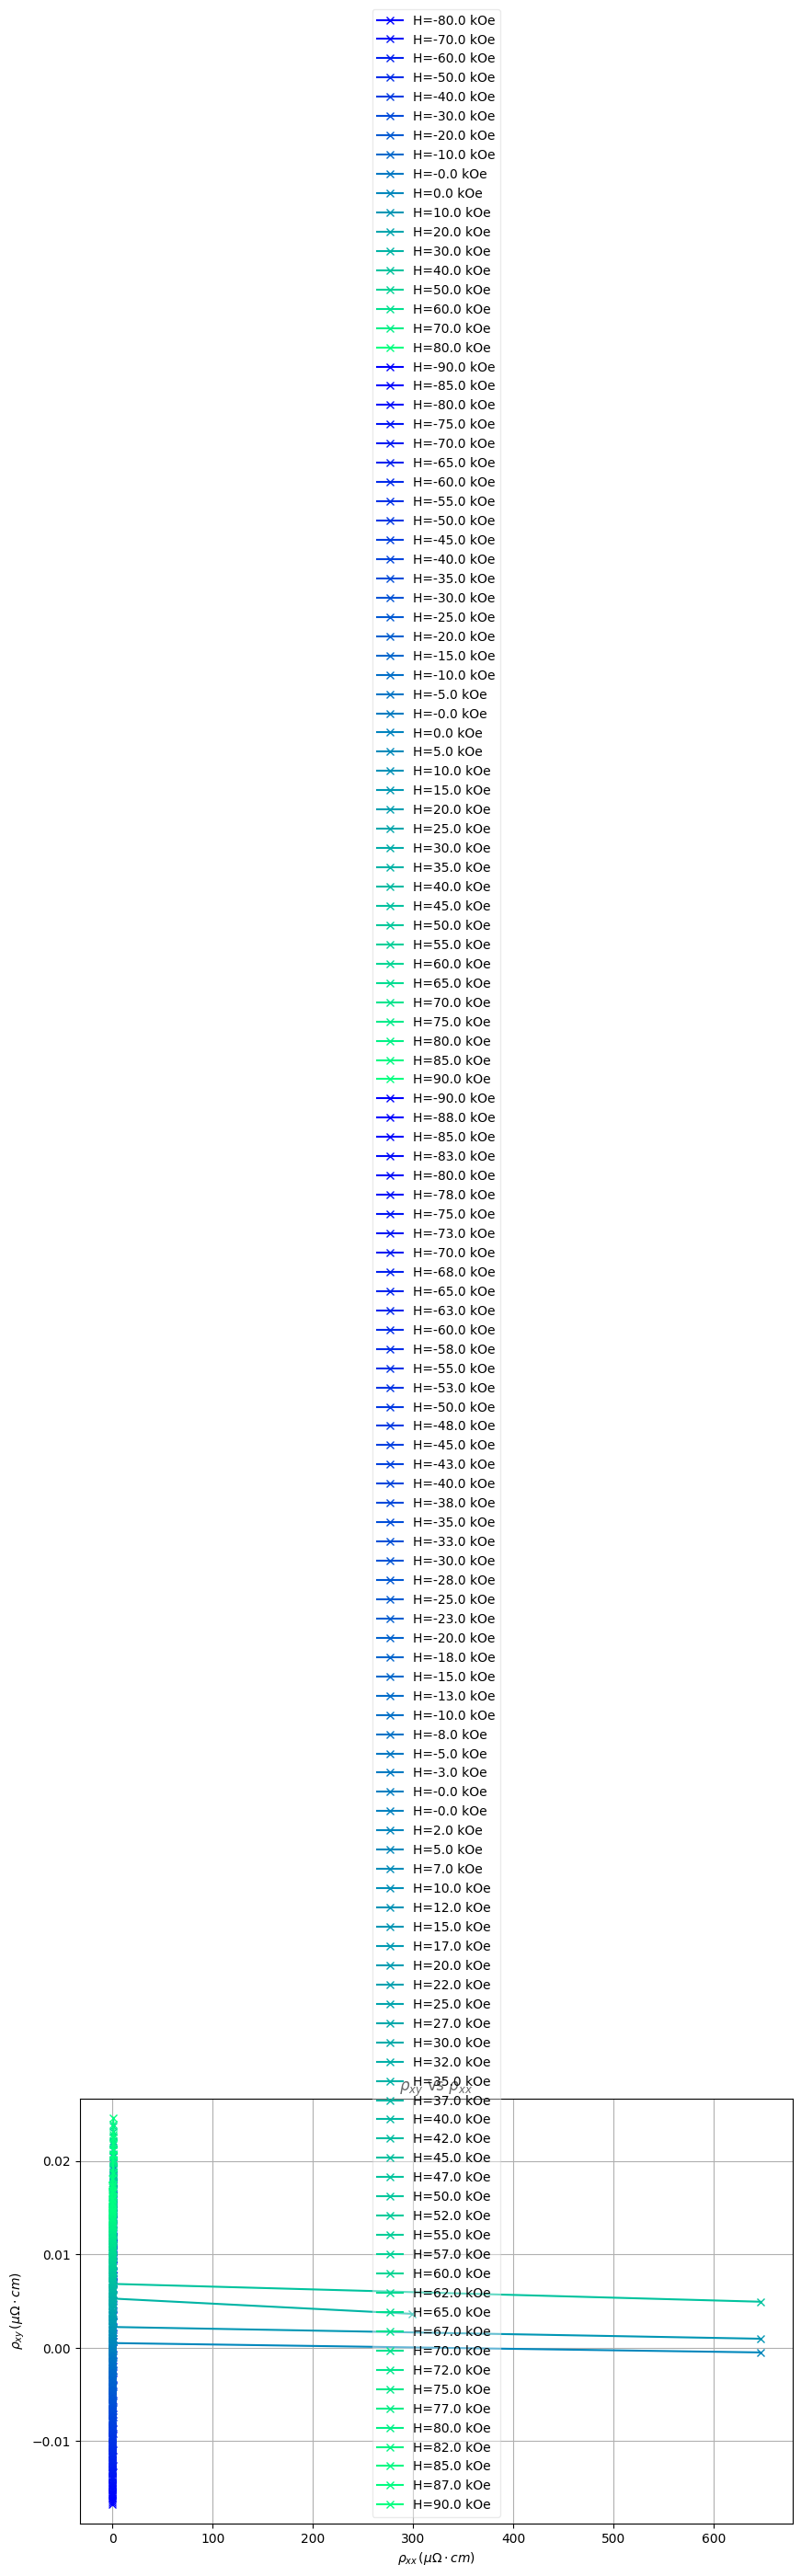

In [39]:
# Create a figure and axis
fig13 = plt.figure(figsize=(10, 6))
ax = fig13.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for d in dat:
    # Generate color map
    c_val = plt.get_cmap('winter')(np.linspace(0, 1, d.ctf[5]))

    # Create separate marker arrays for positive and negative fields stitched together
    markers = ['x'] * d.ctf[5]

    for H_count, H in enumerate(d.ctf[2], start=0):
        # Plot rho_film vs Temp
        ax.plot(d.res_data[H_count::d.ctf[5], 4] * 1e8, d.hall_data[H_count::d.ctf[5], 6] * 1e8, marker=markers[H_count], color=c_val[H_count], label=f'H={np.round(H * 10, decimals=0)} kOe')

ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc='best', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig13.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_rho_xy.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


In [ ]:
if powerpoint_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

    # Define a function to add a slide with a title and image
    def add_slide(prs, title, fig):
        slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Set background color with 40% transparency
        background = slide.background
        fill = background.fill
        fill.solid()
        fill.fore_color.rgb = RGBColor(200, 200, 200)

        # Add title with custom font
        title_shape = slide.shapes.title
        title_shape.text = title
        title_shape.text_frame.paragraphs[0].font.size = Pt(24)
        title_shape.text_frame.paragraphs[0].font.bold = True
        title_shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)
        title_shape.text_frame.paragraphs[0].font.name = 'Arial'
        title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

        # Save the figure as an image
        img_path = f"{title}.png"
        fig.savefig(img_path, dpi=300, bbox_inches='tight', transparent=True)

        
         # Calculate the left position to center the image
        slide_width = prs.slide_width
        image_width = Inches(8)
        left = (slide_width - image_width) / 2
        top = Inches(2)  # Position the figure lower down by 2 inches
        
        # Add the image to the slide
        pic = slide.shapes.add_picture(img_path, left, top, width=image_width)

    # List of figures and their corresponding titles
    figures = [
        (fig0, "Plot IV data to Check Linearity"),
        (fig1, "R-squared Analysis to Check Linearity of I-V data"),
        (fig2, "Resistivity Configuration Compararison"),
        (fig3, "Resistivity vs Temperature"),
        (fig4, "Magnetoresistance vs H"),
        (fig5, "Magnetoresistance Vs T"),
        (fig6, "Arhenius Plot"),
        (fig7, "R-squared Analysis to Check Linearity of Resistivity I-V data"),
        (fig8, "Hall resisitivity vs Temperature"),
        (fig9, "Hall resisitivity vs Applied Field"),
        (fig10, "Hall resisitivity vs Applied Field - Offset Removed"),
        (fig11, "Hall Coeff Vs T"),
        (fig12, "Mobility vs T"),
        (fig13, "ρ_xy vs ρ_xx")
    ]

    # Add each figure to the PowerPoint presentation
    for fig, title in figures:
        add_slide(prs, title, fig)

    # Save the PowerPoint presentation
    prs.save(Path(path_out).joinpath(f'{plot_string}_figures.pptx'))

In [ ]:
# Define a class to store the VNA data alongside its ascociated with the filename, device index, state and DC resistance
@dataclass
class PPMSData:
    data_import_np: np.ndarray #raw data from the PPMS instrument
    data_import_df: pd.DataFrame #data from the PPMS instrument in a pandas dataframe
    
    data_np: np.ndarray #PPMS data sliced and reordered for analysis
    data_df: pd.DataFrame #PPMS data sliced and reordered for analysis in a pandas dataframe
    
    ctf: list # Storing extract values from data [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]
    
    tf_av: np.ndarray #average temperature and field values as measured during each set of current measurements
    
    res_data: np.ndarray #resistivity data calculated using the Van der Pauw method: columns = ['Temp (K)', 'Field (T)', 'rho_xx_A (ohm.m)', 'rho_xx_B(ohm.m)','rho_xx_average(ohm.m)']
    res_data_df: pd.DataFrame #resistivity data calculated using the Van der Pauw method in a pandas dataframe
    R_squared_res: list #R-squared values for the linear regression of the IV data
    
    mag_res: np.ndarray #magnetoresistance data calculated for each temperature and field strength
    
    hall_data: np.ndarray #Hall resistivity data calculated for each temperature and field strength: columns = ['Temp (K)', 'Field (T)', 'rho_xy_A(ohm.m)', 'R_squared(I)_A', 'rho_xy_B(ohm.m)','R_squared(I)_B', 'rho_xy_average(ohm.m)']
    hall_data_df: pd.DataFrame #Hall resistivity data calculated for each temperature and field strength in a pandas dataframe
    hall_coefficient: np.ndarray #Hall coefficient data calculated for each temperature: columns = ['Temp (K)', 'Hallco_A', 'R^2(H)_A', 'Hallco_B','R^2(H)_B', 'Hallco_average']
    hall_coefficient_df: pd.DataFrame #Hall coefficient data calculated for each temperature in a pandas dataframe
    
    filename: str
    film_thickness: float  #thickness of the film in meters - set to 1 as default, if set to 1 then you are calculating sheet resistance not resistivity
    material: str #material of the film
    plot_str: str #strings to be used at the start of the figure file name, including the sample code
    